In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter

In [37]:
# Download the csv file.
!curl https://www.domcop.com/files/top/top10milliondomains.csv.zip -o ./top10milliondomains.zip && unzip ./top10milliondomains.zip && rm ./top10milliondomains.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  112M  100  112M    0     0  15.0M      0  0:00:07  0:00:07 --:--:-- 18.7M
Archive:  ./top10milliondomains.zip
  inflating: top10milliondomains.csv  


In [3]:
FILE = './top10milliondomains.csv'

In [4]:
df = pd.read_csv(FILE)

In [5]:
df.head(10)

,Rank,Domain,Open Page Rank
0,1,facebook.com,10.0
1,2,fonts.googleapis.com,10.0
2,3,twitter.com,10.0
3,4,google.com,10.0
4,5,youtube.com,10.0
5,6,s.w.org,10.0
6,7,instagram.com,10.0
7,8,googletagmanager.com,10.0
8,9,linkedin.com,10.0
9,10,ajax.googleapis.com,10.0


## Clean up

Find out the unique domain names.

In [6]:
def extract_domain(s):
    return '.'.join(s.split('.')[-2:])

In [7]:
df['Domain_Clean'] = df['Domain'].apply(extract_domain)

In [8]:
df

,Rank,Domain,Open Page Rank,Domain_Clean
0,1,facebook.com,10.00,facebook.com
1,2,fonts.googleapis.com,10.00,googleapis.com
2,3,twitter.com,10.00,twitter.com
3,4,google.com,10.00,google.com
4,5,youtube.com,10.00,youtube.com
...,...,...,...,...
9999995,9999996,art.robertcanaga.com,2.44,robertcanaga.com
9999996,9999997,weisseubanks.com,2.44,weisseubanks.com
9999997,9999998,broncobytes.boisestate.edu,2.44,boisestate.edu
9999998,9999999,forshagaakademin.se,2.44,forshagaakademin.se


In [9]:
including_subdomains = len(df['Domain'].unique())
only_domains = len(df['Domain_Clean'].unique())

In [10]:
clean_percentage = only_domains / including_subdomains * 100
print(f"{clean_percentage}%")

68.93697%


Nice. Removing the redundancies got us down to 7M domains to keep a track of.

In [11]:
df['Open Page Rank']

0          10.00
1          10.00
2          10.00
3          10.00
4          10.00
           ...  
9999995     2.44
9999996     2.44
9999997     2.44
9999998     2.44
9999999     2.44
Name: Open Page Rank, Length: 10000000, dtype: float64

In [86]:
bins = np.linspace(2, 10.0, endpoint=True, num=10, dtype=np.float64)

In [87]:
bins

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

In [81]:
cumulative_frequencies = [
    df[df['Open Page Rank'] <= bins[idx]].count()[0] for idx in range(len(bins))
]
frequencies = list((x - y) for (x, y) in zip(cumulative_frequencies[1:], cumulative_frequencies[:-1]))

In [100]:
x_values = bins[1:]
y_values = list(frequencies)

In [101]:
print(x_values)
print(y_values)

[ 2.88888889  3.77777778  4.66666667  5.55555556  6.44444444  7.33333333
  8.22222222  9.11111111 10.        ]
[5304733, 3581474, 1084624, 26961, 1877, 247, 55, 16, 13]


### Just how do the Open Page Rank scores of these domains compare within the list?

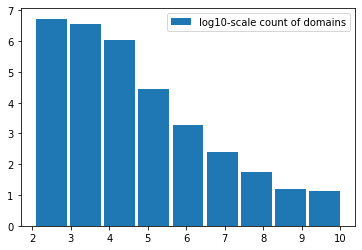

In [114]:
log_scale_plot = plt.bar(align='edge', x=x_values, height=np.log10(y_values), width=-0.8)
plt.legend(['log10-scale count of domains'])
plt.show()

There are significantly more domains (approx $O(10^7)$) with a poor Open Page Rank score (say less than 5) than the good quality ones (score at least 5) which there are only about $O(10^1)$ of.

**Suggestion**: Can drop the latter no-good domains if need arises.

In [15]:
page_rank_at_least_3 = df[df['Open Page Rank'] >= 3]

In [17]:
good_top_domains = page_rank_at_least_3['Domain_Clean'].unique()

In [153]:
top_20_domains = df['Domain_Clean'].unique()[:20]

In [154]:
top_20_domains

array(['facebook.com', 'googleapis.com', 'twitter.com', 'google.com',
       'youtube.com', 'w.org', 'instagram.com', 'googletagmanager.com',
       'linkedin.com', 'gmpg.org', 'gstatic.com', 'youtu.be',
       'cloudflare.com', 'pinterest.com', 'wikipedia.org',
       'wordpress.org', 'bit.ly', 'goo.gl', 'github.com', 'apple.com'],
      dtype=object)

In [18]:
print(
    "\n".join(good_top_domains),
    file=open('top_domains_page_rank_at_least_3.txt', 'w')
)